In [82]:
%config IPCompleter.greedy=True

Given a dataset that contains customer information (such as Age, Income, and Spending Score), perform K-means clustering to group customers into clusters. Use visualization chart, plot the data before and after grouping. Also, use the Elbow Method to determine the optimal number of clusters.


In [106]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

In [107]:
df = pd.read_csv("datasets/income_clustering.csv")

df = df[["Age", "Income($)"]]

df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [108]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417


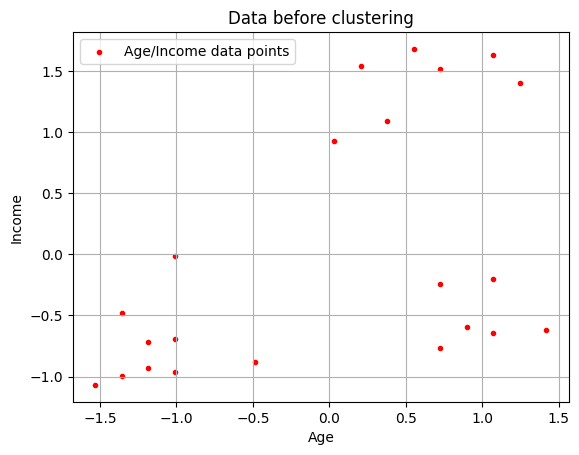

In [109]:
plt.scatter(df_scaled["Age"], df_scaled["Income($)"], color="red", marker=".", label="Age/Income data points")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Data before clustering")
plt.grid()
plt.legend()

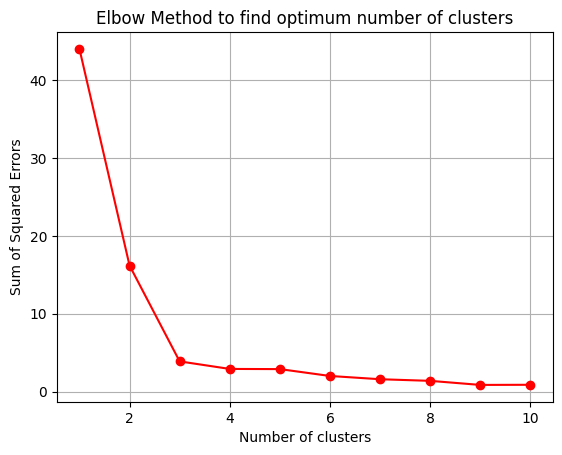

In [114]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(np.array(range(1, 11)), inertia, marker="o", color="red")
plt.title("Elbow Method to find optimum number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Errors")
plt.grid()

In [116]:
km = KMeans(n_clusters=3)

df_scaled["Cluster"] = km.fit_predict(df_scaled)

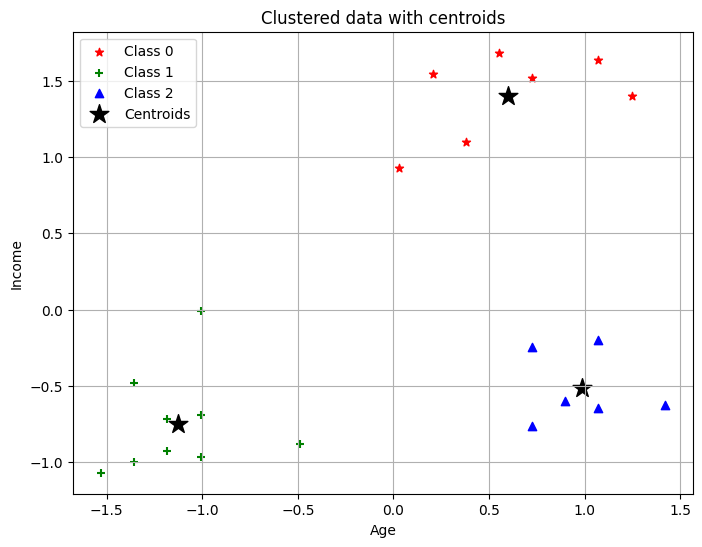

In [132]:
plt.figure(figsize=(8, 6))

colors = ["r", "g", "b"]
markers = ["*", "+", "^"]

for i in range(3):
    class_points = df_scaled[df_scaled["Cluster"] == i]
    plt.scatter(class_points["Age"], class_points["Income($)"], marker=markers[i], color=colors[i], label=f"Class {i}")

centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color="black", s=200, marker="*", label="Centroids")

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Clustered data with centroids")
plt.grid()
plt.legend()